In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import ndcg_score, dcg_score

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data= pd.read_csv('/content/gdrive/MyDrive/XGBoost/GT-shuffled_2407.csv')

In [ ]:
data.head()

,Response Time,Availability,Throughput,Reliability,Latency,Rank
0,182.25,67,9.7,67,46.50,1672
1,175.50,90,7.6,80,39.00,1585
2,500.71,92,2.2,67,233.85,2432
3,175.00,86,9.4,73,3.00,435
4,996.00,83,14.0,83,59.00,2088


In [ ]:
x = data.drop('Rank', axis=1)
y = data['Rank']

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state =1) 

In [ ]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=5)

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, eval_metric='mae', early_stopping_rounds=10)


[0]	validation_0-mae:1140.62036	validation_1-mae:1096.08891
[1]	validation_0-mae:1027.73059	validation_1-mae:987.73119
[2]	validation_0-mae:926.12838	validation_1-mae:890.11021
[3]	validation_0-mae:834.46634	validation_1-mae:801.86488
[4]	validation_0-mae:752.09963	validation_1-mae:722.78674
[5]	validation_0-mae:678.04441	validation_1-mae:652.39587
[6]	validation_0-mae:611.11795	validation_1-mae:588.31299
[7]	validation_0-mae:550.76424	validation_1-mae:530.28309
[8]	validation_0-mae:496.57410	validation_1-mae:478.46984
[9]	validation_0-mae:447.82196	validation_1-mae:431.82404
[10]	validation_0-mae:403.75027	validation_1-mae:389.70195
[11]	validation_0-mae:364.03980	validation_1-mae:351.61796
[12]	validation_0-mae:328.36613	validation_1-mae:317.89523
[13]	validation_0-mae:296.35730	validation_1-mae:287.17085
[14]	validation_0-mae:267.46501	validation_1-mae:259.63836
[15]	validation_0-mae:241.29275	validation_1-mae:234.51876
[16]	validation_0-mae:217.80072	validation_1-mae:212.53328
[17]

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-mae:55.21601	validation_1-mae:60.60050
[31]	validation_0-mae:50.60300	validation_1-mae:56.66133
[32]	validation_0-mae:46.50385	validation_1-mae:53.11448
[33]	validation_0-mae:42.74902	validation_1-mae:49.88497
[34]	validation_0-mae:39.43267	validation_1-mae:47.04832
[35]	validation_0-mae:36.53021	validation_1-mae:44.54843
[36]	validation_0-mae:33.98289	validation_1-mae:42.44848
[37]	validation_0-mae:31.76033	validation_1-mae:40.62862
[38]	validation_0-mae:29.72554	validation_1-mae:38.96290
[39]	validation_0-mae:28.01123	validation_1-mae:37.44762
[40]	validation_0-mae:26.52200	validation_1-mae:36.22739
[41]	validation_0-mae:25.23817	validation_1-mae:35.07506
[42]	validation_0-mae:24.10239	validation_1-mae:34.07890
[43]	validation_0-mae:23.07612	validation_1-mae:33.18382
[44]	validation_0-mae:22.07250	validation_1-mae:32.30814
[45]	validation_0-mae:21.23130	validation_1-mae:31.59079
[46]	validation_0-mae:20.55317	validation_1-mae:31.04034
[47]	validation_0-mae:19.95922	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

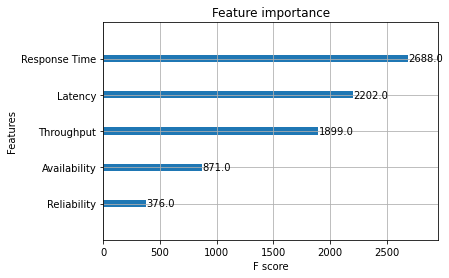

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
xgb.plot_importance(model, ax=plt.gca())

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['mae']
test_error = results['validation_1']['mae']

In [ ]:
print(f"Training error: {train_error[-1]:.2f}")
print(f"Test error: {test_error[-1]:.2f}")
best_iteration = model.best_iteration
print("best_iteration:",best_iteration )

Training error: 6.34
Test error: 22.28
best_iteration: 303


In [ ]:
predictions = model.predict(x_test)

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
pred_train

array([  28.058863, 1793.3158  , 1097.7296  , ..., 2041.2614  ,
       1597.7047  ,  376.02924 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  ## use function score   RMSE

In [ ]:
print( r2_score(y_train, pred_train) ) # how much variance the model explains?

0.9998425399703247


In [ ]:
print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ??

81.94339782131647


In [ ]:
print( mean_absolute_error(y_train, pred_train) )

6.4843984707872915


In [ ]:
model.score(x_test, y_test)  ## R^2

0.9982408129426609

In [ ]:
print(r2_score(y_test, predictions))

0.9982408129426609


In [ ]:
print(mean_squared_error(y_test, predictions))

935.7713629807259


In [ ]:
print(mean_absolute_error(y_test, predictions))

22.26711332702941


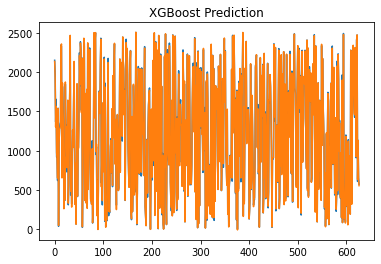

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label="original")
plt.plot(x_ax, predictions, label= "predicted")
plt.title("XGBoost Prediction")
plt.legend
plt.show()

In [ ]:
data2= pd.read_csv('/content/gdrive/MyDrive/XGBoost/Top100.csv')

In [ ]:
data2.head()

,Response Time,Availability,Throughput,Reliability,Latency,Rank
0,41.0,97,43.1,73,1.0,1
1,57.0,98,34.6,73,1.0,2
2,57.0,86,40.1,73,1.0,3
3,78.0,100,35.3,67,1.0,4
4,78.0,92,36.9,73,1.0,5


In [ ]:
x2 = data2.drop('Rank',axis=1)
y2 = data2['Rank']

In [ ]:
x_test_top100 = x2
y_test_top100 = y2 

In [ ]:
predictions = model.predict(x_test_top100)

In [ ]:
model.score(x_test_top100, y_test_top100) 

0.981032862518111

In [ ]:
print(r2_score(y_test_top100, predictions))

0.981032862518111


In [ ]:
print(mean_squared_error(y_test_top100, predictions))

15.804367306784012


In [ ]:
print(mean_absolute_error(y_test_top100, predictions))

2.627472722530365


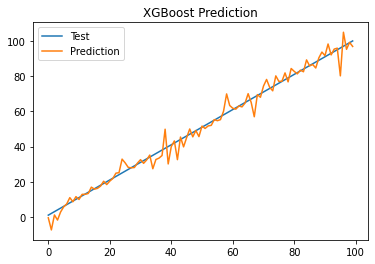

In [ ]:
x_ax_top100 = range(len(y_test_top100))
plt.plot(x_ax_top100,y_test_top100, label="original")
plt.plot(x_ax_top100, predictions, label= "predicted")
plt.title("XGBoost Prediction")
plt.legend(['Test', 'Prediction'], loc='best')
plt.legend
plt.show()

In [ ]:
print(predictions)

[ -0.50026727  -7.3851004    1.1140289   -1.775481     2.7965868
   5.69833      7.4036584   10.955493     8.629443    11.519109
   9.914225    12.830167    12.861836    13.313282    16.908216
  15.790501    16.224026    17.51604     20.270388    18.384228
  20.336409    21.849405    24.85996     25.132942    32.841362
  30.728855    28.151062    27.920717    28.058863    30.585709
  32.527695    30.452578    32.38571     35.138172    27.375877
  32.615734    33.405224    34.90059     49.83738     30.104494
  39.95822     43.18728     32.53593     45.40438     39.80423
  45.062443    49.96212     45.50717     49.097294    45.63048
  51.6136      50.26499     51.70637     52.034454    55.29769
  54.68057     55.268814    60.02668     69.88808     63.325012
  61.758236    61.237526    63.039803    62.52641     64.66841
  70.02787     65.00618     56.917744    69.51232     67.97757
  74.358574    78.11159     73.67209     71.665375    80.14746
  77.00184     77.114174    81.83643     76.7